</div>

# <center><div class="alert alert-success">Fraud detection in auto insurance claims</div></center>
### <div class="alert alert-danger">Problem Statement:</br> To predict the fraud in auto insurance claims based on the demographic, policy, claim, and vehilce related features provided in the datasets and also generate the top 20 patterns for fraud on target attribute.</div>
<div class="alert alert-info"> Data Provided: </br>
    1) Demographics Data: These files consist of the demographic data of each customer</br>
    2) Policy Information: These files consist of the customer auto insurance policy information,connected to the claim with the insurance company.</br>
    3) Data of Claim: These files consist of the details about the insurance claim, that the customer applied.</br>
    4) Data of Vehicle: These files consist of the details about the Vehicle. </br>
    5) Fraud Data: This Train.csv table contains the Fraud information details, like CustomerID, ReportedFraud.</div>
<div class="alert alert-warning">Evaluation metrics: </br> Just classifing a given customer details into fraud and Not fraud and blocking a genuine transaction for long time would bring bad impact on customer experience rather I consider providing probability score for each class and based on that the if there is a higher probability of transaction being fraud we might send that details to insurance company to have more checks instead of checking every customer details. Also by having more business understanding probability score helps to vary the threshold for considering any customer details as Fraud and Genuine.</br> 
    
    Further, as it is important for insurance company to not miss out on any Fraudulent cases, considering Precision, Recall, and F1-score as metric as it stress more on correctly classifying the case of TRUE POSITIVE will be more precise in this case.</br>
    
&#10148; Log-Loss</br>
&#10148; Confusion Metrics</br>
&#10148; F1-score / F1 statistic</br></div>

In [1]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import log_loss, confusion_matrix, f1_score, ConfusionMatrixDisplay, make_scorer

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("final_data.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
print(df.shape)
df.head()

(28836, 43)


,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,InsurancePolicyNumber,...,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,Year,Month,days,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,119121,...,0.0,NoReport,65501.0,13417,6071,46013,2015,2,3,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,119122,...,1.0,YES,61382.0,15560,5919,39903,2015,2,2,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,119123,...,3.0,NO,66755.0,11630,11630,43495,2015,1,15,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,119124,...,3.0,NO,66243.0,12003,12003,42237,2015,1,19,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,119125,...,1.0,YES,53544.0,8829,7234,37481,2015,1,9,N


In [3]:
df.isnull().sum().sum()

0

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,...,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,Year,Month,days
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000,...,28836.000000,28836.000000,28836.00000,28836.000000,28836.000000,28836.000000,28836.000000,28836.0,28836.000000,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429,129312.517097,203.067867,1114.282529,1261.725810,9.836680e+05,2005.093113,...,1.823207,0.985782,1.48429,52319.038355,7337.118428,7283.870197,37687.129387,2015.0,1.495110,15.010300
std,7.996377,72250.868871,27637.813724,27913.209608,11114.060267,99.932951,546.632816,204.882653,1.969282e+06,5.309956,...,0.980099,0.784764,1.04469,25080.664083,4427.638593,4375.842738,17977.048232,0.0,0.516162,7.603878
min,19.000000,430104.000000,0.000000,-111100.000000,110122.000000,1.000000,500.000000,436.280000,-1.000000e+06,1995.000000,...,1.000000,0.000000,-1.00000,150.000000,0.000000,0.000000,109.000000,2015.0,1.000000,1.000000
25%,33.000000,448603.000000,0.000000,-50000.000000,119698.750000,126.000000,622.000000,1125.247500,0.000000e+00,2001.000000,...,1.000000,0.000000,1.00000,44686.250000,4743.750000,4862.000000,32193.250000,2015.0,1.000000,9.000000
50%,38.000000,466691.000000,0.000000,0.000000,129278.500000,199.000000,1000.000000,1266.440000,0.000000e+00,2005.000000,...,1.000000,1.000000,1.00000,58360.000000,7147.000000,7051.000000,42457.500000,2015.0,1.000000,15.000000
75%,44.000000,603848.000000,49000.000000,0.000000,138933.250000,267.000000,1627.000000,1396.605000,4.859610e+05,2010.000000,...,3.000000,2.000000,2.00000,68961.750000,10571.250000,10327.000000,49535.750000,2015.0,2.000000,21.000000
max,64.000000,620962.000000,100500.000000,0.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,2015.000000,...,4.000000,2.000000,3.00000,114920.000000,21450.000000,23670.000000,79560.000000,2015.0,3.000000,31.000000


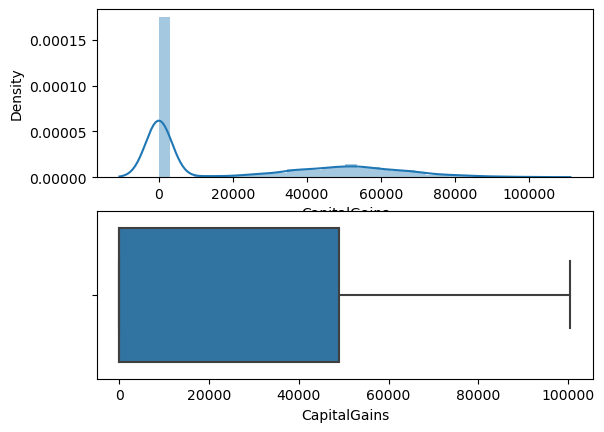

In [6]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
plot(df,'CapitalGains')

## Data preprocessing 

In [7]:
df["Year_PolicyCoverage"] = df['DateOfPolicyCoverage'].apply(lambda x: int(x.split("-")[0]))
df["Month_PolicyCoverage"] = df['DateOfPolicyCoverage'].apply(lambda x: int(x.split("-")[1]))
df["days_PolicyCoverage"] = df['DateOfPolicyCoverage'].apply(lambda x: int(x.split("-")[2]))

In [8]:
#Spliting the Policy CombinedSingleLimit into split-limit and combinedsinglelimit
df['Policy_SplitLimit'] = df['Policy_CombinedSingleLimit'].apply(lambda x: int(x.split("/")[0]))
df['Policy_CombinedSingleLimit'] = df['Policy_CombinedSingleLimit'].apply(lambda x: int(x.split("/")[1]))

In [9]:
df.drop(['CustomerID', 'InsurancePolicyNumber','VehicleID','DateOfPolicyCoverage','InsuredEducationLevel','InsuredRelationship','IncidentAddress'],axis=1,inplace=True)

In [10]:
# Perform labelEncoding on -- ReportedFraud, VehicleModel

df['ReportedFraud'] = df['ReportedFraud'].astype("category").cat.codes
df['VehicleModel'] = df['VehicleModel'].astype("category").cat.codes

### One-Hot Encoding

In [11]:
# Performing one-hot encoding
OHE_cols = ['InsuredGender', 'InsuredHobbies', 'InsuredOccupation', 'InsurancePolicyState', 'IncidentState', 'VehicleMake',
            'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentCity',
            'PropertyDamage', 'PoliceReport']

for i in OHE_cols:
    #Create object for one-hot encoding
    encoder = ce.OneHotEncoder(cols=i, handle_unknown='value',return_df=True,use_cat_names=True)

    #Fit and transform Data
    data_encoded1 = encoder.fit_transform(df[i])
    
    #drop column in the original dataframe
    df.drop(i,axis=1,inplace=True)
    
    #concat onehotencoded data to original
    df = pd.concat([df, data_encoded1], axis=1)

In [12]:
print(df.shape)
df.head(5)

(28836, 117)


,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleYOM,...,IncidentCity_City6,IncidentCity_City4,IncidentCity_City3,IncidentCity_City2,IncidentCity_City7,PropertyDamage_YES,PropertyDamage_NO,PoliceReport_NoReport,PoliceReport_YES,PoliceReport_NO
0,35,454776,56700,-48500,49,300,1000,1632.73,0,2008,...,0,0,0,0,0,1,0,1,0,0
1,36,454776,70600,-48500,114,300,1000,1255.19,0,2006,...,0,0,0,0,0,1,0,0,1,0
2,33,603260,66400,-63700,167,1000,617,1373.38,0,1999,...,1,0,0,0,0,1,0,0,0,1
3,36,474848,47900,-73400,190,1000,722,1337.60,0,2003,...,1,0,0,0,0,1,0,0,0,1
4,29,457942,0,-41500,115,300,500,1353.73,4279863,2010,...,1,0,0,0,0,0,1,0,1,0


In [13]:
df.isnull().sum().sum()

0

## Split the data into train and test dataset to evaluate the model for unseen data

In [14]:
x = df.drop('ReportedFraud',axis=1)
y = df['ReportedFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# <center>Model Building

### Random model (benchmark model)

In [15]:
# first lets build a Random model (as our benchmark model)
rnd = x_test.shape[0]
rnd_probpred = []
rnd_pred = []

def random_model(rnd):
    for i in range(rnd):
        a = random.uniform(0,1)
        rnd_probpred.append([a,1-a])

random_model(rnd)
rnd_probpred = np.asarray(rnd_probpred)

for i in rnd_probpred:
    rnd_pred.append(np.argmax(i))

In [16]:
confusion_matrix = confusion_matrix(y_test, rnd_pred)
print("The confusion matrix for the random model is: ",confusion_matrix)

print("The Log-Loss for a Random Model is: ",log_loss(y_test,rnd_probpred))

print("The F1-Score for a Random Model is: ",f1_score(y_test,rnd_pred))

The confusion matrix for the random model is:  [[3214 3159]
 [1146 1132]]
The Log-Loss for a Random Model is:  0.9940075125707256
The F1-Score for a Random Model is:  0.3446491094534937


### Naive Bayes 

In [17]:
# Applying grid search to hyperparameter tune the BernoulliNB model

#Instance for Naive Bayes classifier
nb = BernoulliNB()

#params for Bernoulli Naive bayes model
nb_params = [{'alpha':[10**x for x in range(-5,5)], 'fit_prior':[True,False]}]

#Instance for Naive Bayes Classifier and f1 metric
f1score = make_scorer(f1_score,greater_is_better=True, needs_proba=False)
nbclf = GridSearchCV(nb, nb_params, cv=10, scoring=f1score)

#training the model to find the best parameter
nbclf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                    1000, 10000],
                          'fit_prior': [True, False]}],
             scoring=make_scorer(f1_score))

In [18]:
print("The best parameter after GridSearch comes out to be: ",nbclf.best_params_)
print("With the F1 statistic of: ",nbclf.best_score_)

The best parameter after GridSearch comes out to be:  {'alpha': 1, 'fit_prior': True}
With the F1 statistic of:  0.6626685857926666


#### Well Naive bayes surely is doing good than a random model with so we can take this into consideration. Now trying out with more complex models and try improving the F1-score further.

### KNN

In [19]:
# min max sclaer
scaler = MinMaxScaler()
scaler.fit(x_train)
x_trainknn = scaler.transform(x_train)
x_testknn = scaler.transform(x_test)

In [20]:
# Applying grid search to hyperparameter tune the KNN model

#Instance for KNN model
knn = KNeighborsClassifier()

#Hyperparameter for search
knn_params = [{'n_neighbors':list(range(1,20,2)), 'weights':['uniform','distance']}]

#Instance for Grid Search CV
f1score = make_scorer(f1_score, greater_is_better=True, needs_proba=False)
clf = GridSearchCV(knn, knn_params, cv=10, scoring=f1score)

#training the model to find the best parameter
clf.fit(x_trainknn, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                          'weights': ['uniform', 'distance']}],
             scoring=make_scorer(f1_score))

In [21]:
print("The best parameter after GridSearch comes out to be: ",clf.best_params_)
print("With the F1 statistic of: ",clf.best_score_)

The best parameter after GridSearch comes out to be:  {'n_neighbors': 7, 'weights': 'uniform'}
With the F1 statistic of:  0.8702983984872918


#### Thats F1-score of 0.87 with KNN, so definitely KNN is performing good than a random model and working considerably well. Now trying out with more complex models.

### LogisticRegression

In [22]:
#Creating Instance for StandardScaler 
scaler = StandardScaler()

scaler.fit(x_train)

x_trainlr = scaler.transform(x_train)

In [23]:
#Hyper-parameter tunning for logistic regression

#Instance for the LogisticRegression
lr = LogisticRegression(n_jobs=-1)

#params for search
lr_params = [{'penalty':['l1','l2','elasticnet'],'C':[10**x for x in range(-3,3)],'max_iter':[100,150,200]}]

#Instance for Grid Search CV
f1score = make_scorer(f1_score, greater_is_better=True, needs_proba=False)
lrclf = GridSearchCV(lr, lr_params, cv=10, scoring=f1score)

#training the model to find the best parameter
lrclf.fit(x_trainlr, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 150, 200],
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             scoring=make_scorer(f1_score))

In [24]:
print("The best parameter after GridSearch comes out to be: ",lrclf.best_params_)
print("With the F1 statistic of: ",lrclf.best_score_)

The best parameter after GridSearch comes out to be:  {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
With the F1 statistic of:  0.6696432931568516


#### From the F1-score of LogisticRegression definitely it is performing good than a random model and Naive Bayes Classifier but KNN beats Logistic Regression in this case.

### DecisionTreeClassifier

In [25]:
#Hyper-parameter tunning for DecisionTreeClassifier

#Instance for the DecisionTreeClassifier
dt = DecisionTreeClassifier()

#params for search
dt_params = [{'criterion':['gini','entropy','log_loss'],'max_depth':[x for x in range(2,30)],'min_samples_split':[2,3,4,5]}]

#Instance for Grid Search CV
f1score = make_scorer(f1_score, greater_is_better=True, needs_proba=False)
dtclf = GridSearchCV(dt, dt_params, cv=10, scoring=f1score)

#training the model to find the best parameter
dtclf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring=make_scorer(f1_score))

In [26]:
print("The best parameter after GridSearch comes out to be: ",dtclf.best_params_)
print("With the F1 statistic of: ",dtclf.best_score_)

The best parameter after GridSearch comes out to be:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}
With the F1 statistic of:  0.7411575027932199


#### From the F1-score we can conclude that decision tree classifier is working better than randomModel, Naive Bayes, Logistic Regression but KNN is the best performer till now.

### Random Forest Classifier

In [27]:
#Hyper-parameter tunning for RandomForestClassifier

#Instance for the RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

#params for search
rf_params = [{'criterion':['gini','entropy'],'n_estimators':[x for x in range(100,1000,50)],'min_samples_split':[2,3,4]}]

#Instance for Grid Search CV
f1score = make_scorer(f1_score, greater_is_better=True, needs_proba=False)
rfclf = GridSearchCV(rf, rf_params, cv=10, scoring=f1score)

#training the model to find the best parameter
rfclf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                           450, 500, 550, 600, 650, 700, 750,
                                           800, 850, 900, 950]}],
             scoring=make_scorer(f1_score))

In [28]:
print("The best parameter after GridSearch comes out to be: ",rfclf.best_params_)
print("With the F1 statistic of: ",rfclf.best_score_)

The best parameter after GridSearch comes out to be:  {'criterion': 'gini', 'min_samples_split': 3, 'n_estimators': 600}
With the F1 statistic of:  0.8475012117567303


In [29]:
# Dataframe for Model Score Comparison
d = {"Models":['RandomModel','Naive Bayes', 'KNN','Logistic Regression ','Decision Tree Classifier','RandomForest Classifier'],
     "F1-Score":[0.3401, nbclf.best_score_, clf.best_score_, lrclf.best_score_, dtclf.best_score_, rfclf.best_score_]}
Mscore = pd.DataFrame(d,columns=['Models', 'F1-Score'])
Mscore

,Models,F1-Score
0,RandomModel,0.340100
1,Naive Bayes,0.662669
2,KNN,0.870298
3,Logistic Regression,0.669643
4,Decision Tree Classifier,0.741158
5,RandomForest Classifier,0.847501


### Random Forest classifier is doing great and got near KNN, but still KNN tends to perform well that any other models
## So i am using the KNN clasifier as my model to predict the unseen data. Since we have performed hyperparameter tuning it is for sure we are not over-fitting or under-fitting.